Without Convolution

In [0]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(x_train,y_train,epochs=10)
model.summary()



Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2615
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1155
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0772
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0589
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0453
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0367
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0280
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0242
Epoch 9/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0195
Epoch 10/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0153
Model: "sequential_2"
_________________________________________________________________
Layer (t

[5.9739681e-13 1.6428046e-10 1.3585589e-08 2.8607542e-07 2.8508739e-16
 2.3711508e-09 2.6099894e-08 7.5803938e-16 9.9999964e-01 2.2048409e-10]
8


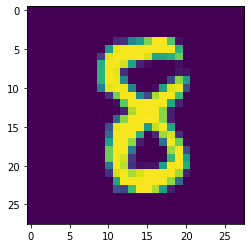

In [0]:
import matplotlib.pyplot as plt
classification=model.predict(x_test)
print(classification[181])
print(y_test[181])
plt.imshow(x_test[181])

Saving a87.jpg to a87 (28).jpg
2352


InvalidArgumentError: ignored

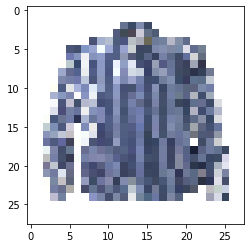

In [0]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

upload=files.upload()
for fn in upload.keys():
  path='/content/'+fn
  imgg=image.load_img(path,target_size=(28,28,3))
  plt.imshow(imgg)
  x=x/255.0
  print(len(x))
  #x=np.vstack([x])
  #print(a.shape)
  classs=model.predict(a)
print(classs)


In [0]:
import tensorflow as tf
mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)
model.evaluate(x_test,y_test)

With Convolution

In [0]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,model,logs={}):
    if(logs.get('acc')>0.99):
      print("\Accuracy of 99% reached")
      self.model.stop_training=True
stop=myCallback()
mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_train=x_train/255.0
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test/255.0
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPool2D((2,2)),
                                  #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  #tf.keras.layers.MaxPool2D((2,2)),
                                  #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  #tf.keras.layers.MaxPool2D((2,2)),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(x_train,y_train,epochs=10,callbacks=[stop])
model.evaluate(x_test,y_test)